## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

In [4]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)

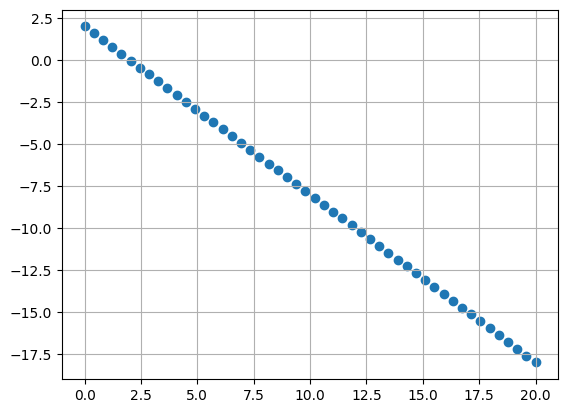

In [6]:
plt.grid()
plt.scatter(X,y)

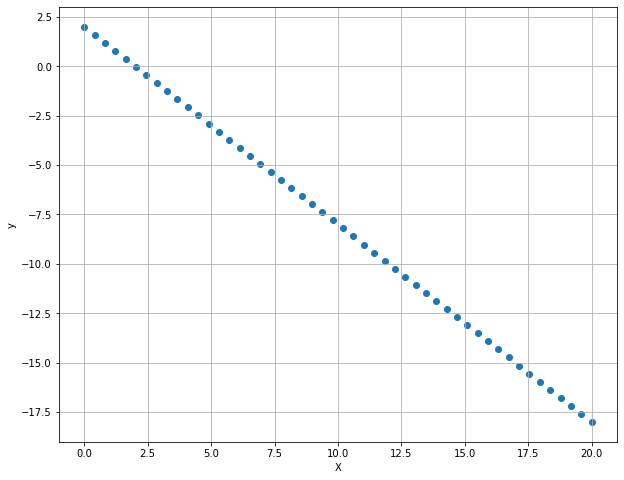

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [10]:

def GD(X,y,alpha,num_iterations):
    m=X.shape[0]
    theta_0=0
    theta_1=0
    loss=[]
    threshold=0.001
    Theta0=[]
    Theta1=[]
    output=[]
    
    for i in range(num_iterations) :
        h_theta = theta_0+ theta_1*X
        
        error_vector=h_theta-y
        norm_2=np.linalg.norm(error_vector)
        norm_square = np.square(norm_2)
        error=norm_square/(2*m)
        
        d_theta_0=(1/m)*np.sum(error_vector)
        d_theta_1=(1/m)*np.sum(error_vector*X)
        gradient_vector=np.array([[d_theta_0,d_theta_1]])
        loss.append(error)
        output.append(h_theta)
        Theta0.append(theta_0)
        Theta1.append(theta_1)
        if np.linalg.norm(gradient_vector) < threshold or ( i>0 and abs(loss[i]-loss[i-1]) < threshold ):
            break
        theta_0=theta_0-alpha*d_theta_0
        theta_1=theta_1-alpha*d_theta_1
        print("Iteration:",i)
        print("h(x):",h_theta)
        print("Error Vector:",error_vector)
        print("j=",error)
        print("Gradient Vector:",gradient_vector)
        print("Gradient Vector Norm:",np.linalg.norm(gradient_vector))
        print("theta_0_new:",theta_0)
        print("theta_1_new:",theta_1)
        print("")
        
        
        
        
    return Theta0,Theta1,output,loss,Theta0[-1],Theta1[-1]

In [12]:
num_iterations=300
alpha=0.0005
Theta0,Theta1,ypred,loss,Theta0_opt,Theta1_opt=GD(X,y,alpha,num_iterations)

Iteration: 0
h(x): [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Error Vector: [[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.73469388]
 [15.14285714]
 [15.55102041]
 [15.9

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [13]:
from sklearn.metrics import r2_score
r2_score(y,ypred[-1])

0.9686158031920962

r2_score: 0.9686158031920962


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

In [14]:
def plotting(loss,color):
    plt.grid()
    plt.plot(loss, linestyle='-' ,marker='o',markersize=5, color=color)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss vs. Iterations')
    plt.show()

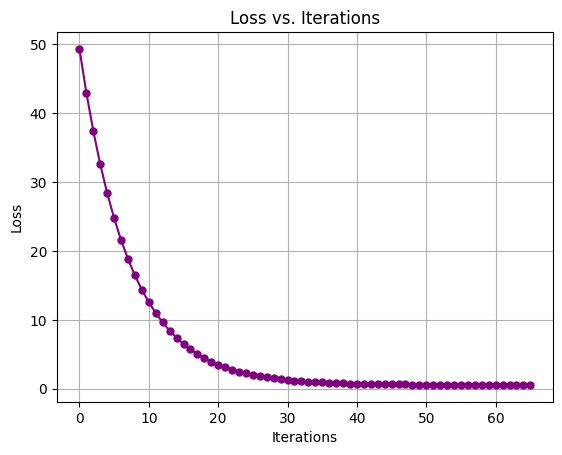

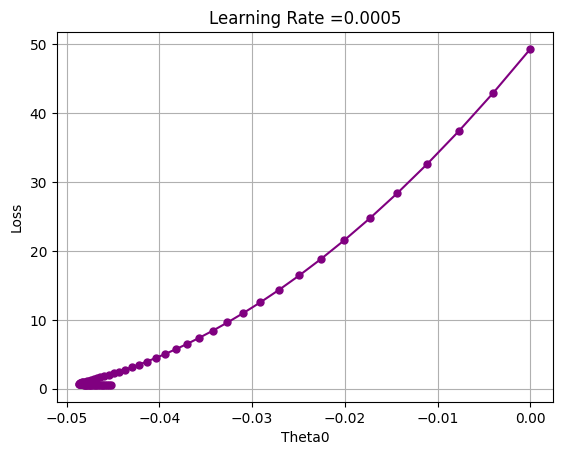

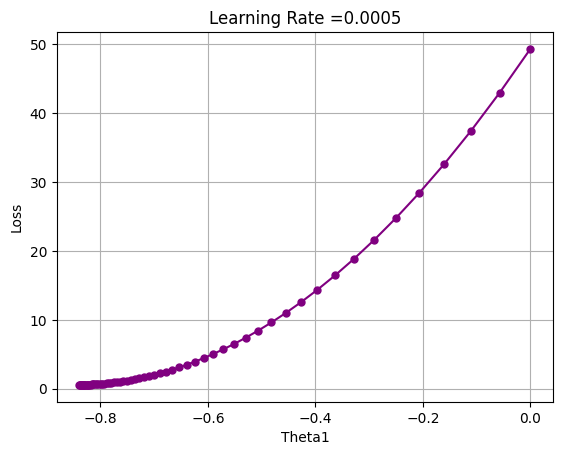

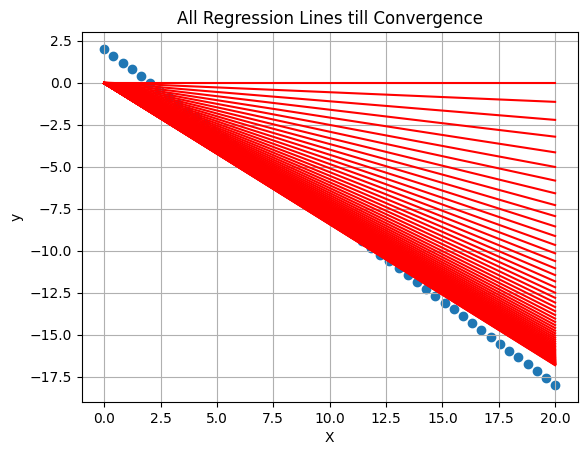

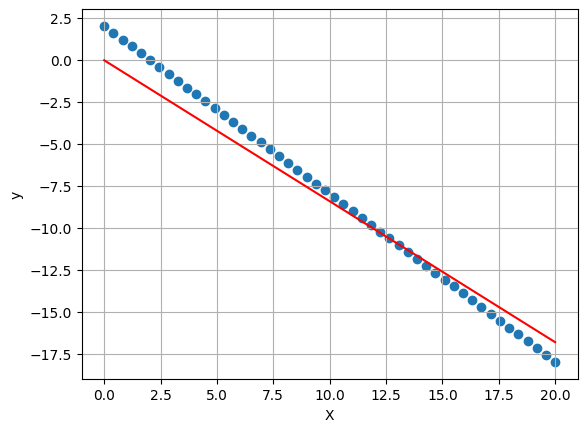

In [17]:
plotting(loss,'purple')
Theta0=np.array(Theta0)
Theta1=np.array(Theta1)
loss=np.array(loss)
#loss[1:].shape,Theta0.shape,Theta1.shape
plt.grid()
plt.plot(Theta0,loss, linestyle='-' ,marker='o',markersize=5, color='purple')
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.title('Learning Rate =0.0005')
plt.show()
plt.grid()
plt.plot(Theta1,loss, linestyle='-' ,marker='o',markersize=5, color='purple')
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.title('Learning Rate =0.0005')
plt.show()
# Plot all regression lines till converge
plt.grid()
plt.scatter(X, y)

for i in range(len(Theta0)):
    y_pred = Theta0[i] + Theta1[i] * X
    plt.plot(X, y_pred, color='red')

plt.xlabel('X')
plt.ylabel('y')
plt.title('All Regression Lines till Convergence')
plt.show()

plt.grid()
plt.scatter(X, y)
plt.plot(X, y_pred, color='red',marker='o',markersize=0.0001)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

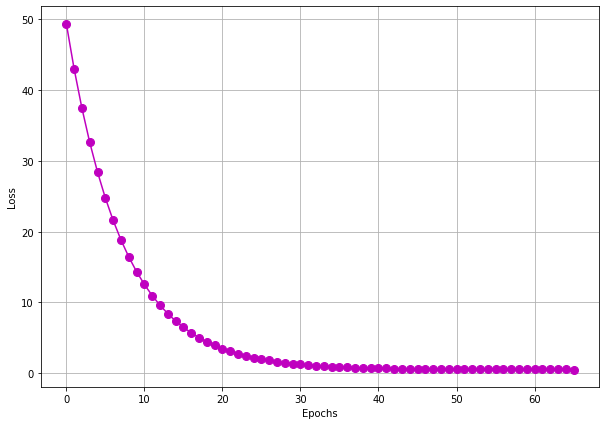

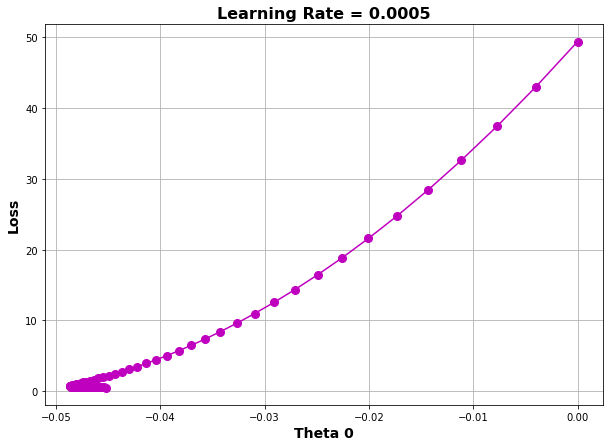

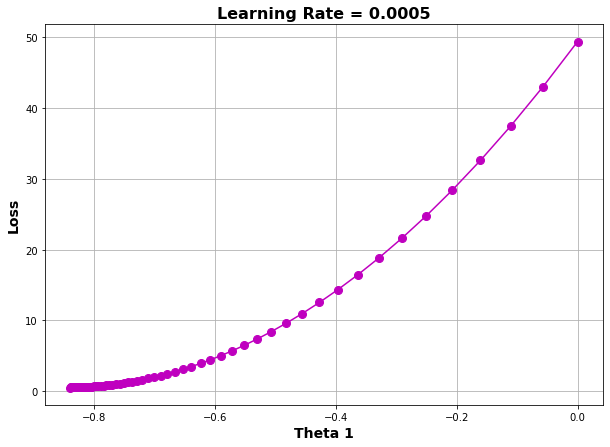

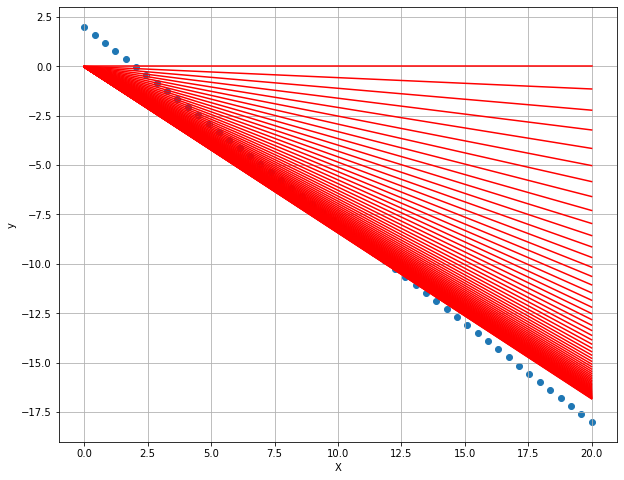

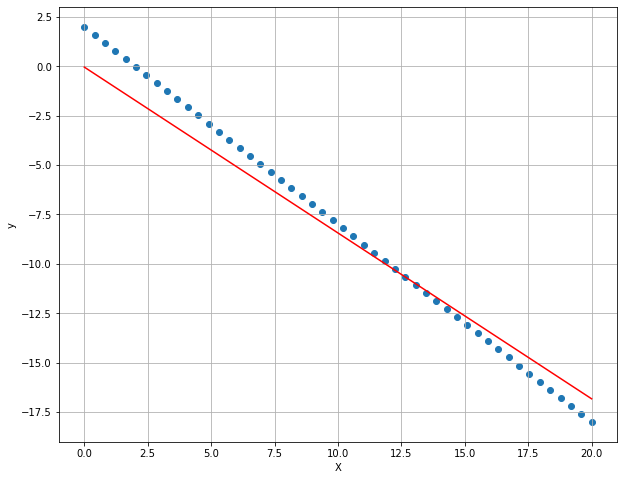

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [20]:
def batch_GD_Mom(X,y,alpha,num_iterations,gamma):
    m=X.shape[0]
    theta_0=0
    theta_1=0
    loss=[]
    threshold=0.001
    Theta0=[]
    Theta1=[]
    ypred=[]
    v_theta_0=0
    v_theta_1=0
    
    for i in range(num_iterations) :
        h_theta = theta_0+ theta_1*X
        
        error_vector=h_theta-y
        norm_2=np.linalg.norm(error_vector)
        norm_square = np.square(norm_2)
        error=norm_square/(2*m)
        
        d_theta_0=(1/m)*np.sum(error_vector)
        d_theta_1=(1/m)*np.sum(error_vector*X)
        gradient_vector=np.array([[d_theta_0,d_theta_1]])
        loss.append(error)
        ypred.append(h_theta)
        Theta0.append(theta_0)
        Theta1.append(theta_1)
        if np.linalg.norm(gradient_vector) < threshold or ( i>0 and abs(loss[i]-loss[i-1]) < threshold ):
            break
        v_theta_0=gamma*v_theta_0+alpha*d_theta_0
        v_theta_1=gamma*v_theta_1+alpha*d_theta_1
        theta_0=theta_0-v_theta_0
        theta_1=theta_1-v_theta_1
        print("Iteration:",i)
        print("h(x):",h_theta)
        print("Error Vector:",error_vector)
        print("j=",error)
        print("Gradient Vector:",gradient_vector)
        print("Gradient Vector Norm:",np.linalg.norm(gradient_vector))
        print("theta_0_new:",theta_0)
        print("theta_1_new:",theta_1)
        print("")
        
        
        
        
    return Theta0,Theta1,ypred,loss,Theta0[-1],Theta1[-1]

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [21]:
alpha=0.0005
num_iterations=300

Theta0,Theta1,ypred,loss,Theta0_opt,Theta1_opt=batch_GD_Mom(X,y,alpha,num_iterations,gamma=0.5)

Iteration: 0
h(x): [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Error Vector: [[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.73469388]
 [15.14285714]
 [15.55102041]
 [15.9

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [22]:
y_pred = Theta0_opt + Theta1_opt * X
r2_score(y,y_pred)

0.9687892837396442

r2_score: 0.9687892837396442


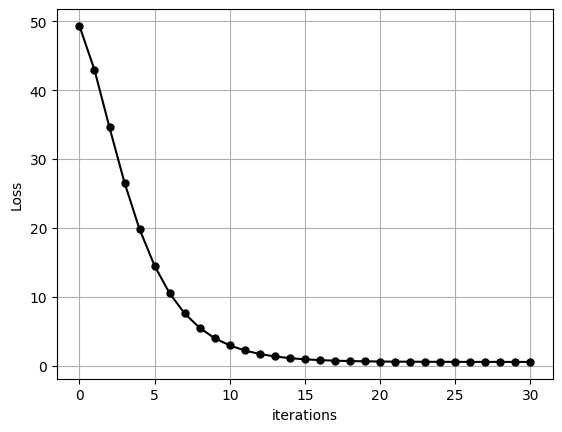

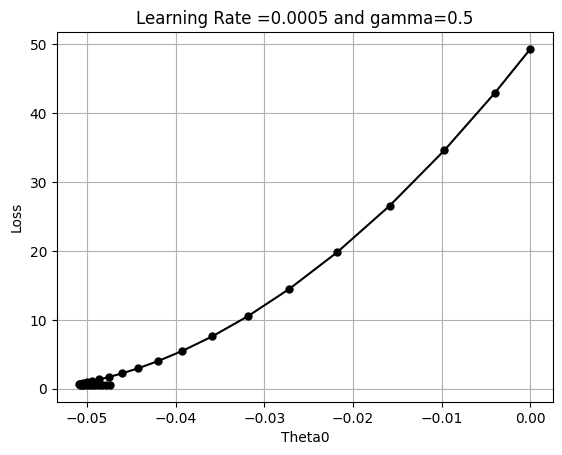

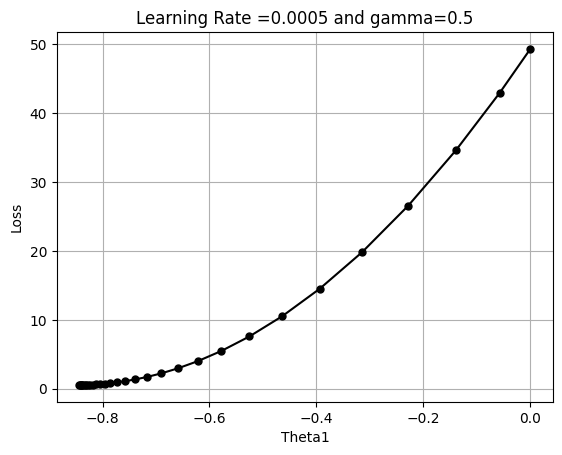

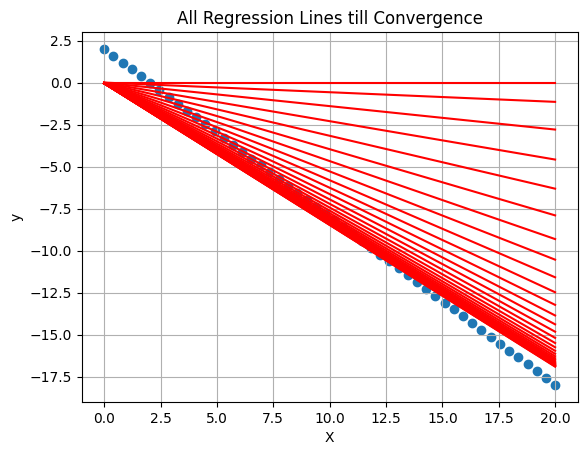

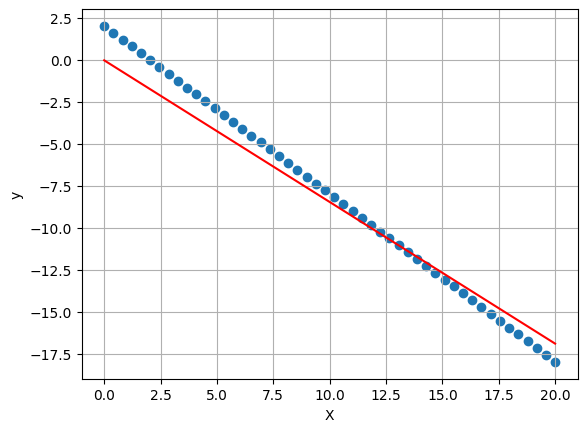

In [25]:
plt.grid()
plt.plot(loss, linestyle='-' ,marker='o',markersize=5, color='black')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.show()
#plotting(loss,'purple')

#loss[1:].shape,Theta0.shape,Theta1.shape
plt.grid()
plt.plot(Theta0,loss, linestyle='-' ,marker='o',markersize=5, color='black')
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.title('Learning Rate =0.0005 and gamma=0.5')
plt.show()
plt.grid()
plt.plot(Theta1,loss, linestyle='-' ,marker='o',markersize=5, color='black')
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.title('Learning Rate =0.0005 and gamma=0.5')
plt.show()
# Plot all regression lines till converge
plt.grid()
plt.scatter(X, y)

for i in range(len(Theta0)):
    y_pred = Theta0[i] + Theta1[i] * X
    plt.plot(X, y_pred, color='red')

plt.xlabel('X')
plt.ylabel('y')
plt.title('All Regression Lines till Convergence')
plt.show()



plt.grid()
plt.scatter(X, y)


plt.plot(X, y_pred, color='red')

plt.xlabel('X')
plt.ylabel('y')

plt.show()

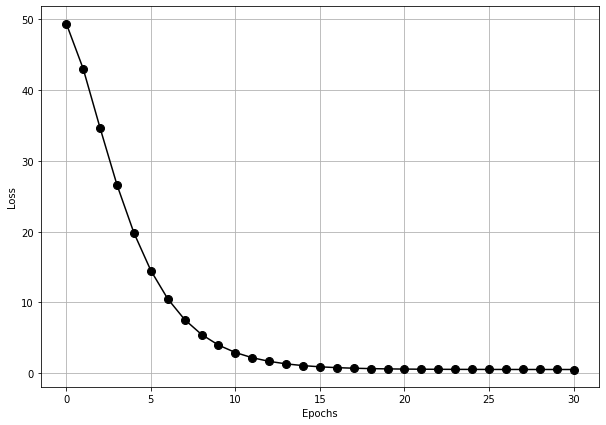

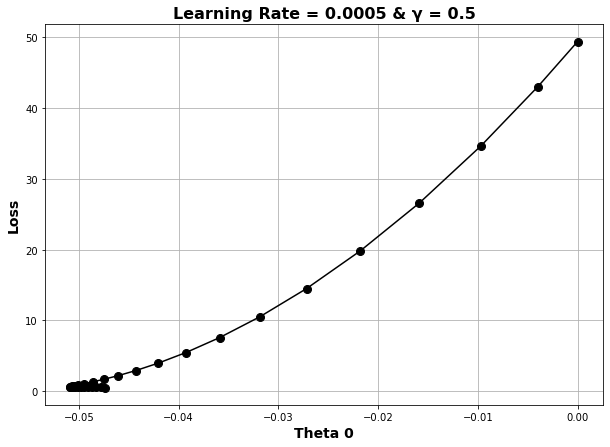

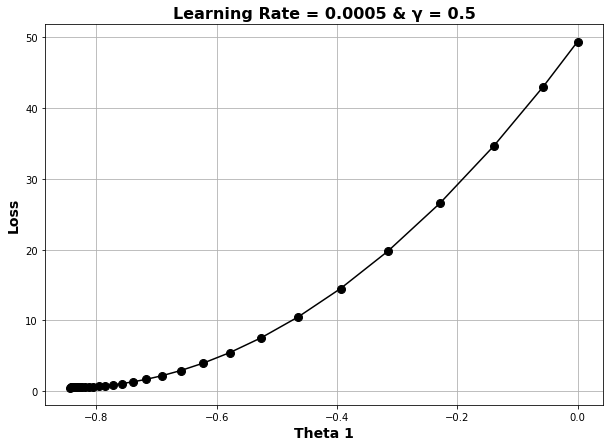

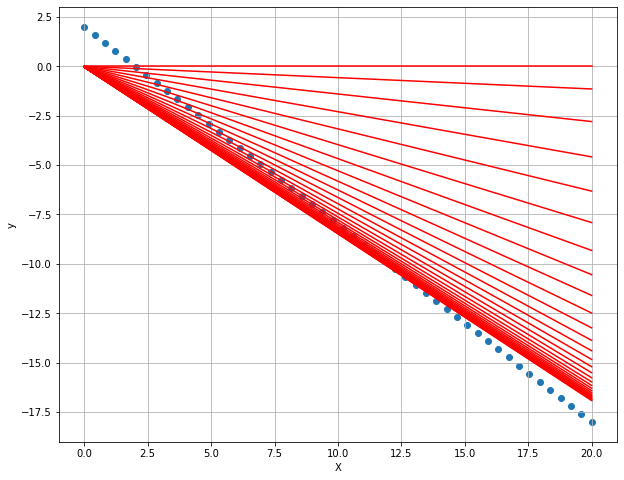

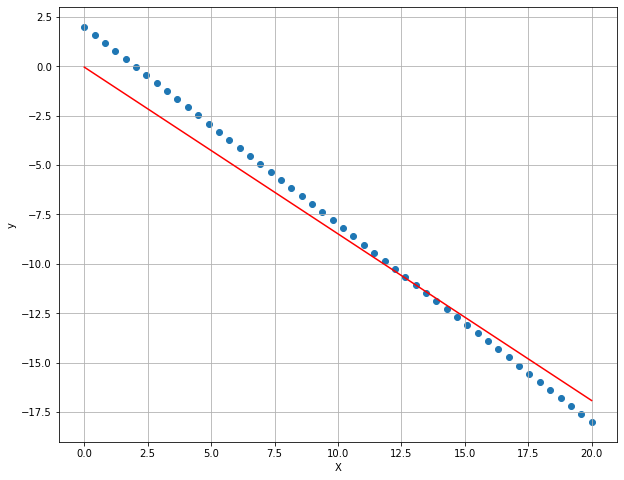

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [26]:
alpha=0.0005
num_iterations=300

Theta0,Theta1,ypred,loss,Theta0_opt,Theta1_opt=batch_GD_Mom(X,y,alpha,num_iterations,gamma=0.9)

Iteration: 0
h(x): [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Error Vector: [[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.73469388]
 [15.14285714]
 [15.55102041]
 [15.9

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [27]:
y_pred = Theta0_opt + Theta1_opt * X
r2_score(y,y_pred)

0.973589591111118

r2_score 0.973589591111118


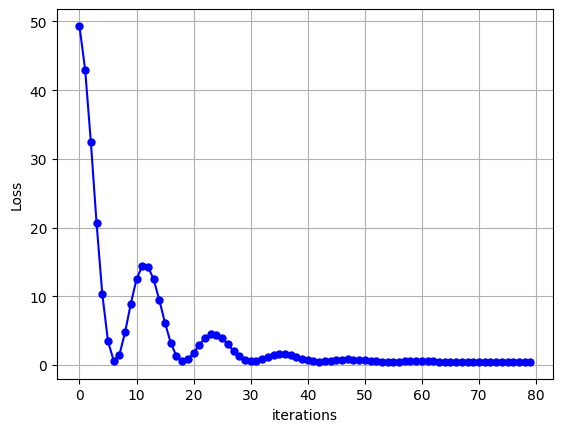

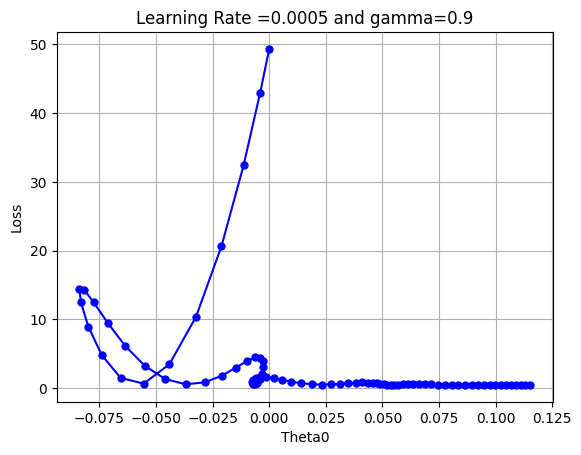

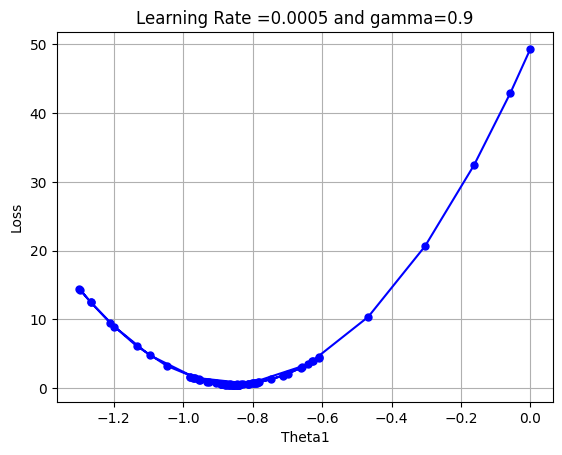

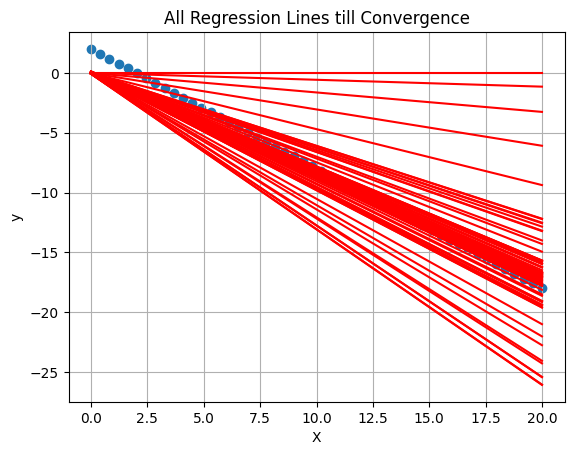

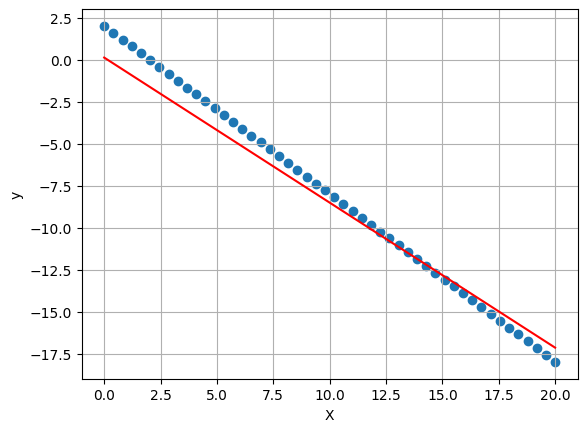

In [28]:
plt.grid()
plt.plot(loss, linestyle='-' ,marker='o',markersize=5, color='blue')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.show()
#plotting(loss,'purple')

#loss[1:].shape,Theta0.shape,Theta1.shape
plt.grid()
plt.plot(Theta0,loss, linestyle='-' ,marker='o',markersize=5, color='blue')
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.title('Learning Rate =0.0005 and gamma=0.9')
plt.show()
plt.grid()
plt.plot(Theta1,loss, linestyle='-' ,marker='o',markersize=5, color='blue')
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.title('Learning Rate =0.0005 and gamma=0.9')
plt.show()
# Plot all regression lines till converge
plt.grid()
plt.scatter(X, y)

for i in range(len(Theta0)):
    y_pred = Theta0[i] + Theta1[i] * X
    plt.plot(X, y_pred, color='red')

plt.xlabel('X')
plt.ylabel('y')
plt.title('All Regression Lines till Convergence')
plt.show()



plt.grid()
plt.scatter(X, y)


plt.plot(X, y_pred, color='red')

plt.xlabel('X')
plt.ylabel('y')

plt.show()

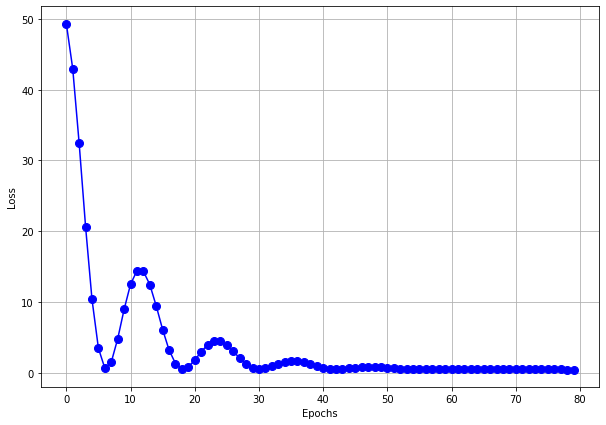

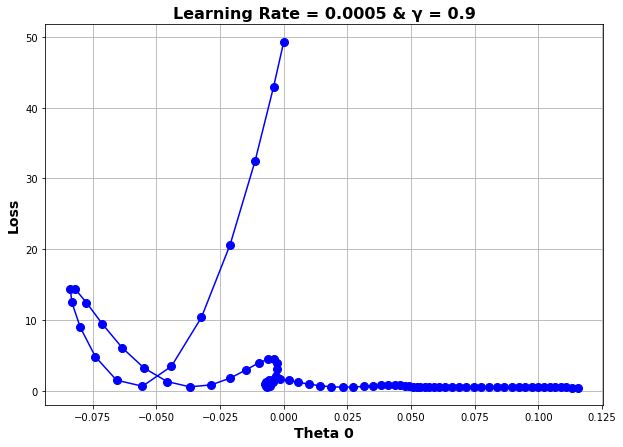

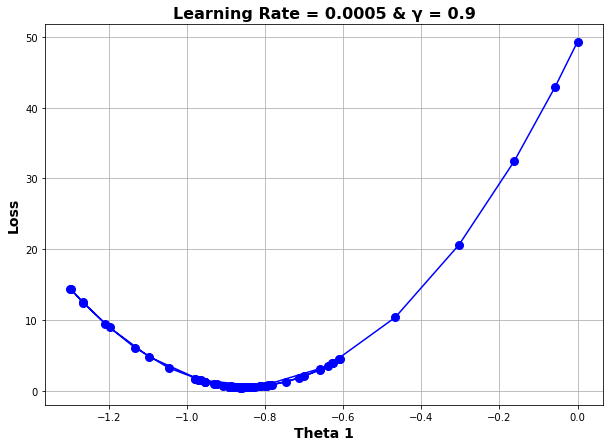

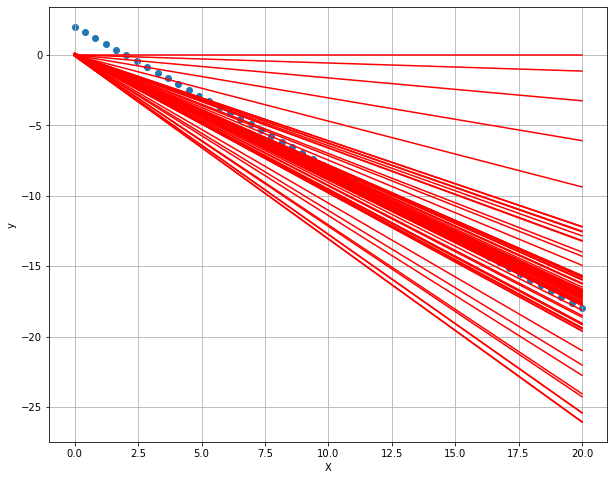

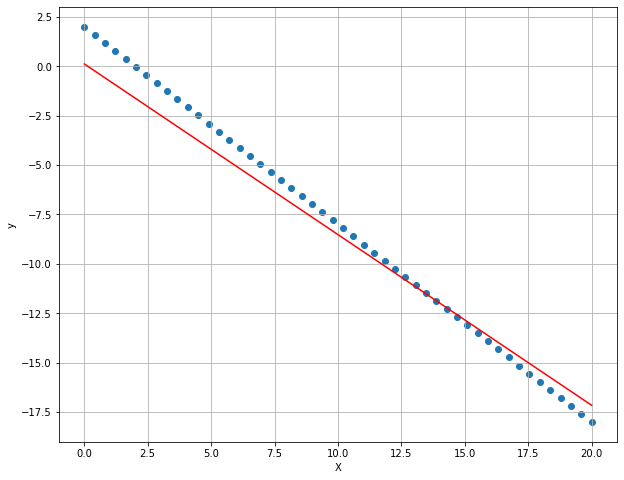

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [29]:
alpha=0.0005
num_iterations=300

Theta0,Theta1,ypred,loss,Theta0_opt,Theta1_opt=batch_GD_Mom(X,y,alpha,num_iterations,gamma=0.89)

Iteration: 0
h(x): [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Error Vector: [[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.73469388]
 [15.14285714]
 [15.55102041]
 [15.9

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

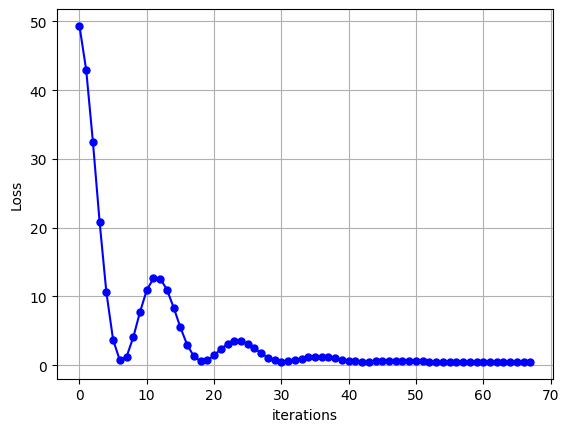

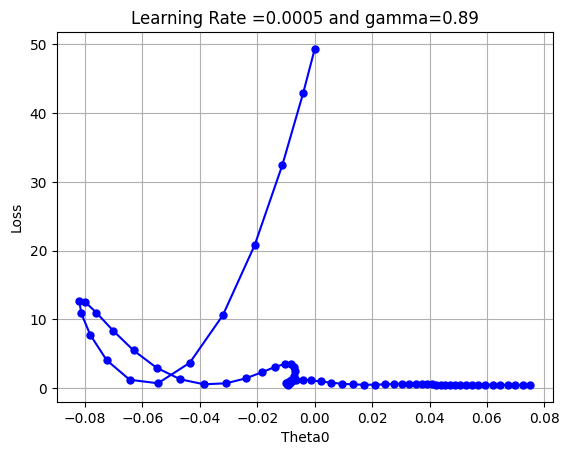

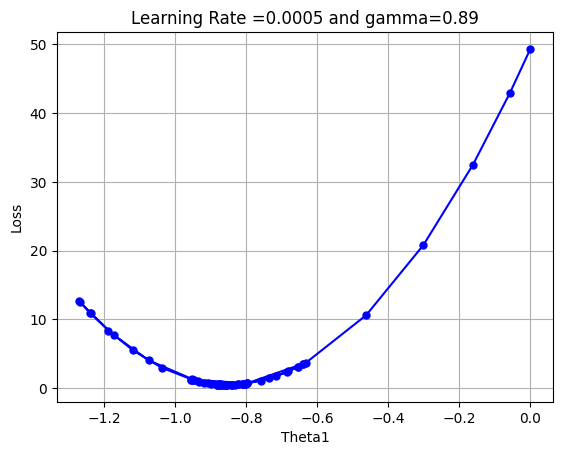

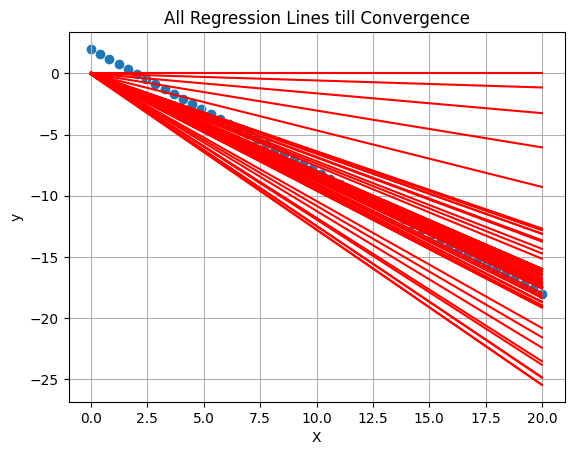

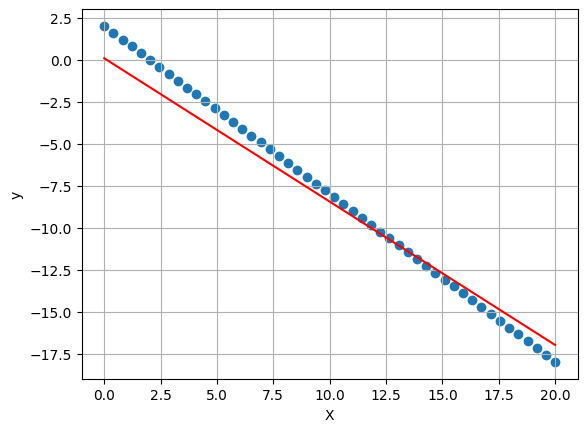

In [30]:
plt.grid()
plt.plot(loss, linestyle='-' ,marker='o',markersize=5, color='blue')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.show()
#plotting(loss,'purple')

#loss[1:].shape,Theta0.shape,Theta1.shape
plt.grid()
plt.plot(Theta0,loss, linestyle='-' ,marker='o',markersize=5, color='blue')
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.title('Learning Rate =0.0005 and gamma=0.89')
plt.show()
plt.grid()
plt.plot(Theta1,loss, linestyle='-' ,marker='o',markersize=5, color='blue')
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.title('Learning Rate =0.0005 and gamma=0.89')
plt.show()
# Plot all regression lines till converge
plt.grid()
plt.scatter(X, y)

for i in range(len(Theta0)):
    y_pred = Theta0[i] + Theta1[i] * X
    plt.plot(X, y_pred, color='red')

plt.xlabel('X')
plt.ylabel('y')
plt.title('All Regression Lines till Convergence')
plt.show()



plt.grid()
plt.scatter(X, y)


plt.plot(X, y_pred, color='red')

plt.xlabel('X')
plt.ylabel('y')

plt.show()

r2 score =  0.972435565060376


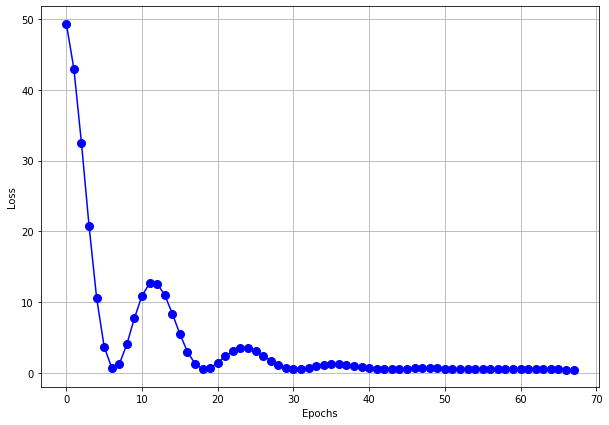

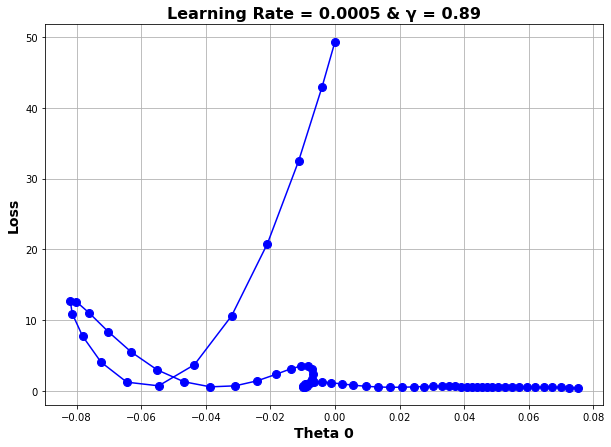

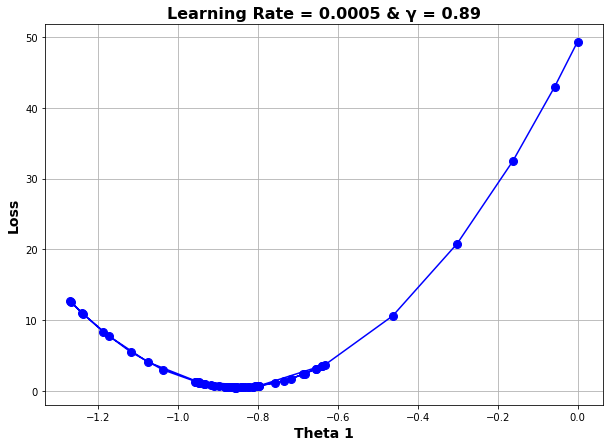

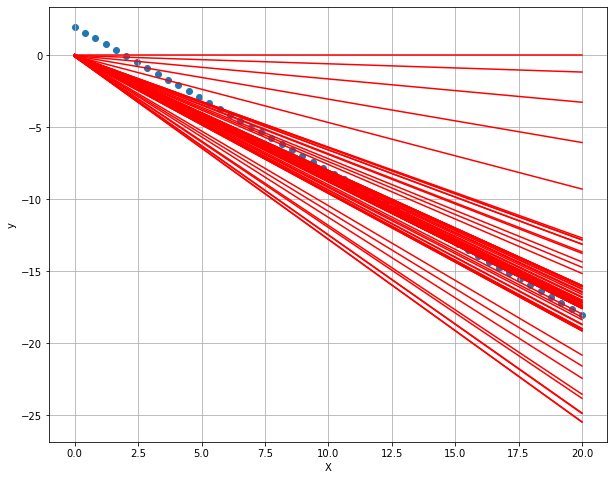

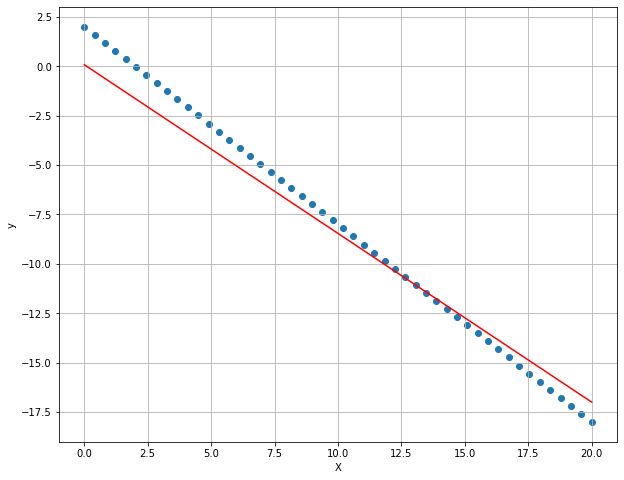

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [31]:
theta0_temp=0
theta1_temp=0

h_temp=theta0_temp+theta1_temp*X

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [38]:
def batch_GD_MomNG(X,y,alpha,num_iterations,gamma):
    m=X.shape[0]
    theta_0=0
    theta_1=0
    loss=[]
    threshold=0.001
    Theta0=[]
    Theta1=[]
    
    vt0=0
    vt1=0
    for i in range(num_iterations) :
        h_theta = theta_0+ theta_1*X
        
        error_vector=h_theta-y
        norm_2=np.linalg.norm(error_vector)
        norm_square = np.square(norm_2)
        error=norm_square/(2*m)
        
        d_theta_0=(1/m)*np.sum(error_vector)
        d_theta_1=(1/m)*np.sum(error_vector*X)
        gradient_vector=np.array([[d_theta_0,d_theta_1]])
        loss.append(error)
        
        Theta0.append(theta_0)
        Theta1.append(theta_1)
        if np.linalg.norm(gradient_vector) < threshold or ( i>0 and abs(loss[i]-loss[i-1]) < threshold ):
            break
        
        theta0_temp=theta_0-gamma*vt0
        theta1_temp=theta_1-gamma*vt1
        h_theta_temp = theta0_temp+ theta1_temp*X
        
        error_vector_temp=h_theta_temp-y
        norm_2_temp=np.linalg.norm(error_vector_temp)
        norm_square_temp = np.square(norm_2_temp)
        error_temp=norm_square_temp/(2*m)
        
        d_theta_0_temp=(1/m)*np.sum(error_vector_temp)
        d_theta_1_temp=(1/m)*np.sum(error_vector_temp*X)
        gradient_vector_temp=np.array([[d_theta_0_temp,d_theta_1_temp]])

        theta_0=theta0_temp-alpha*d_theta_0_temp
        theta_1=theta1_temp-alpha*d_theta_1_temp
        vt0=gamma*vt0+alpha*d_theta_0_temp
        vt1=gamma*vt1+alpha*d_theta_1_temp
        print("Iteration:",i)
        print("h(x):",h_theta)
        print("Error Vector:",error_vector)
        print("j=",error)
        print("Gradient Vector:",gradient_vector)
        print("Gradient Vector Norm:",np.linalg.norm(gradient_vector))
        print("theta_0_new:",theta_0)
        print("theta_1_new:",theta_1)
        print("")
        
        
        
        
    return Theta0,Theta1,loss,Theta0[-1],Theta1[-1]

In [39]:

Theta0,Theta1,loss,Theta0_opt,Theta1_opt=batch_GD_MomNG(X,y,alpha=0.0005,num_iterations=300,gamma=0.9)

Iteration: 0
h(x): [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Error Vector: [[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.73469388]
 [15.14285714]
 [15.55102041]
 [15.9

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [40]:
y_pred = Theta0_opt + Theta1_opt * X
r2_score(y,y_pred)

0.971103130756324

r2_score 0.971103130756324


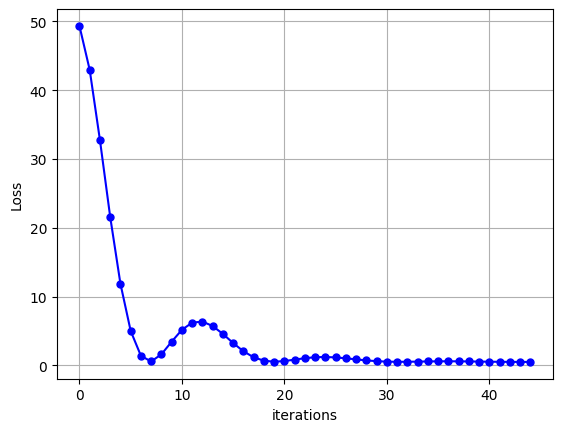

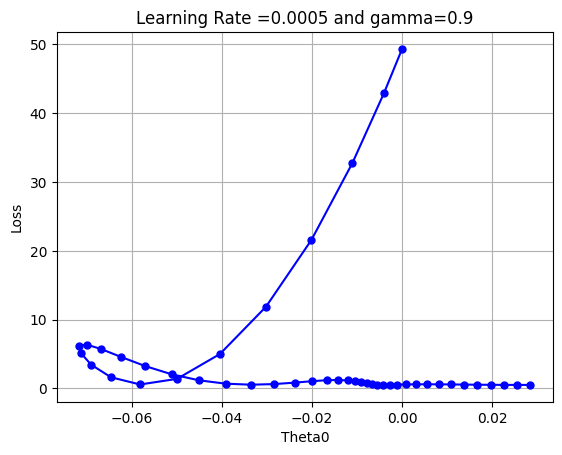

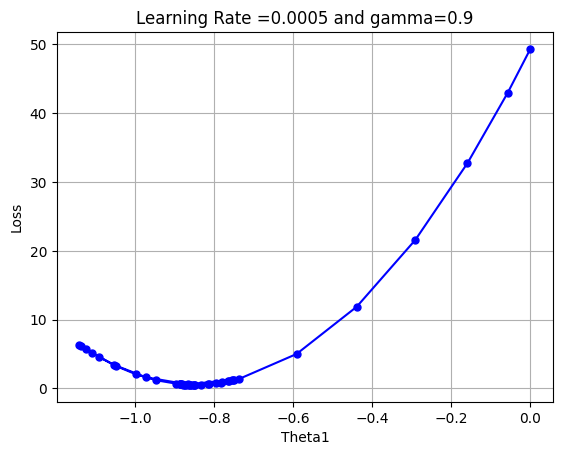

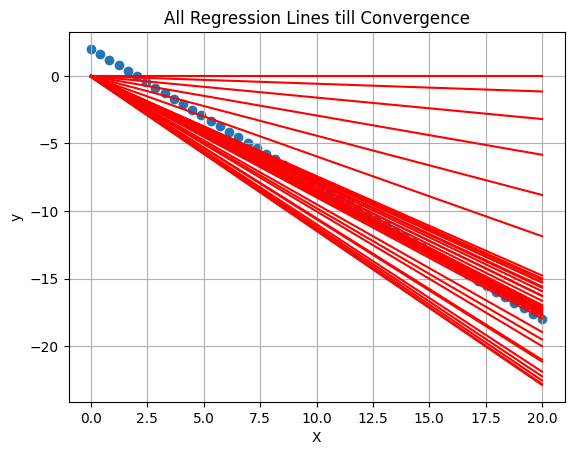

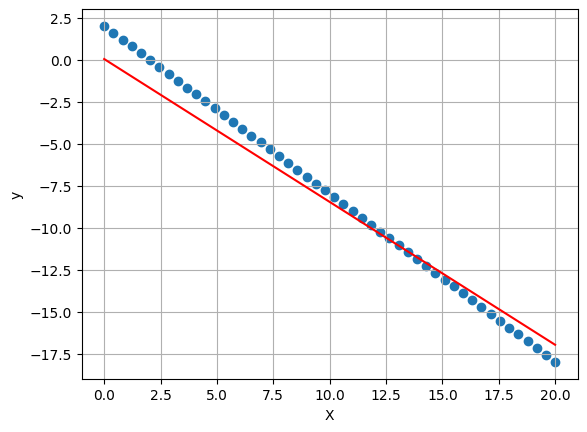

In [41]:
plt.grid()
plt.plot(loss, linestyle='-' ,marker='o',markersize=5, color='blue')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.show()
#plotting(loss,'purple')

#loss[1:].shape,Theta0.shape,Theta1.shape
plt.grid()
plt.plot(Theta0,loss, linestyle='-' ,marker='o',markersize=5, color='blue')
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.title('Learning Rate =0.0005 and gamma=0.9')
plt.show()
plt.grid()
plt.plot(Theta1,loss, linestyle='-' ,marker='o',markersize=5, color='blue')
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.title('Learning Rate =0.0005 and gamma=0.9')
plt.show()
# Plot all regression lines till converge
plt.grid()
plt.scatter(X, y)

for i in range(len(Theta0)):
    y_pred = Theta0[i] + Theta1[i] * X
    plt.plot(X, y_pred, color='red')

plt.xlabel('X')
plt.ylabel('y')
plt.title('All Regression Lines till Convergence')
plt.show()



plt.grid()
plt.scatter(X, y)


plt.plot(X, y_pred, color='red')

plt.xlabel('X')
plt.ylabel('y')

plt.show()

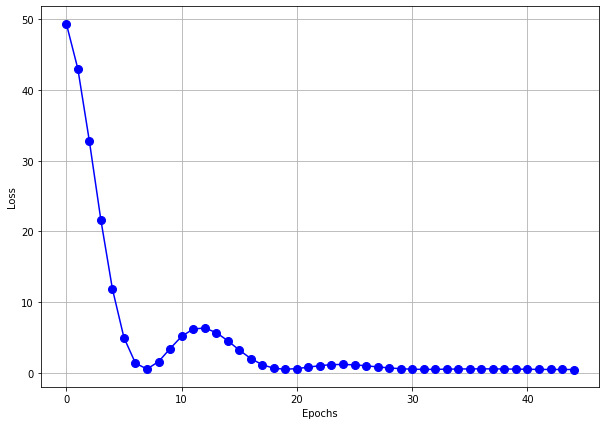

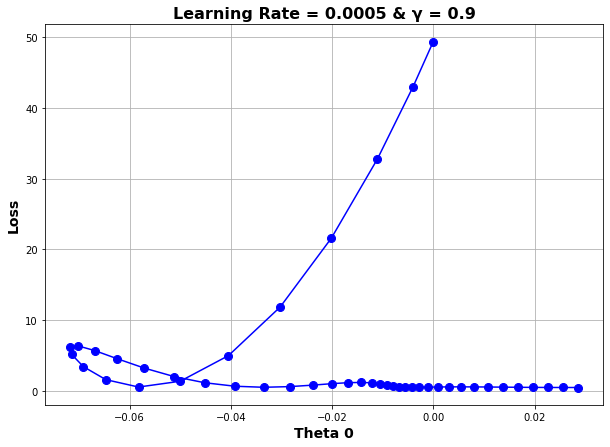

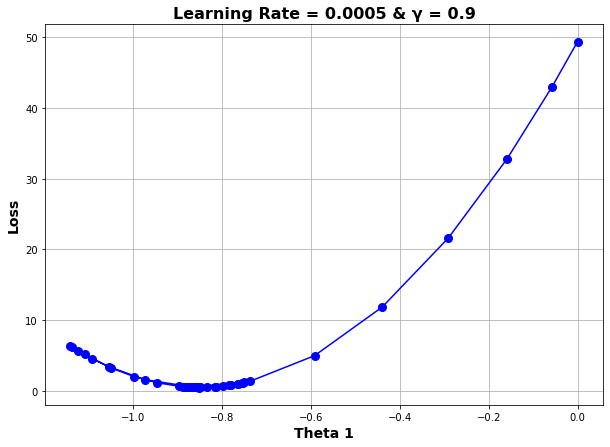

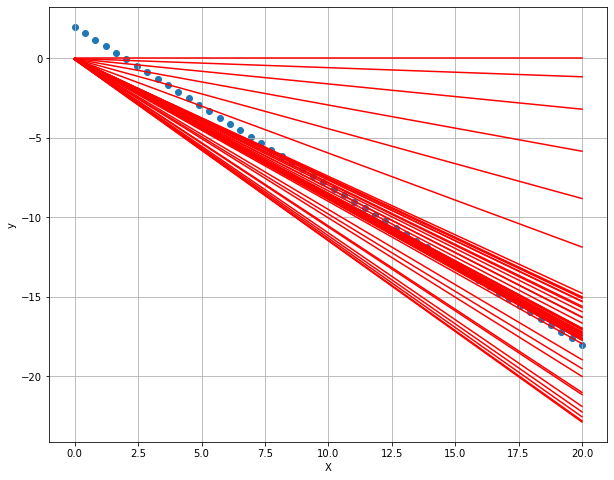

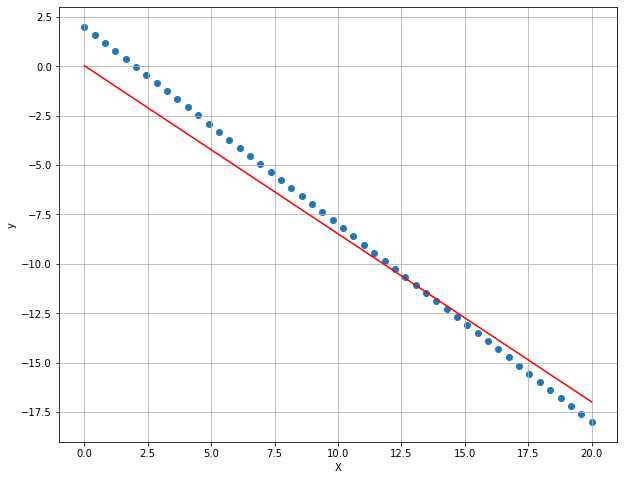

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [42]:
Theta0,Theta1,loss,Theta0_opt,Theta1_opt=batch_GD_MomNG(X,y,alpha=0.0005,num_iterations=300,gamma=0.89)

Iteration: 0
h(x): [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Error Vector: [[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.73469388]
 [15.14285714]
 [15.55102041]
 [15.9

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [44]:
y_pred = Theta0_opt + Theta1_opt * X
r2_score(y,y_pred)

0.9699718983158406

r2 score =  0.9699718983158406


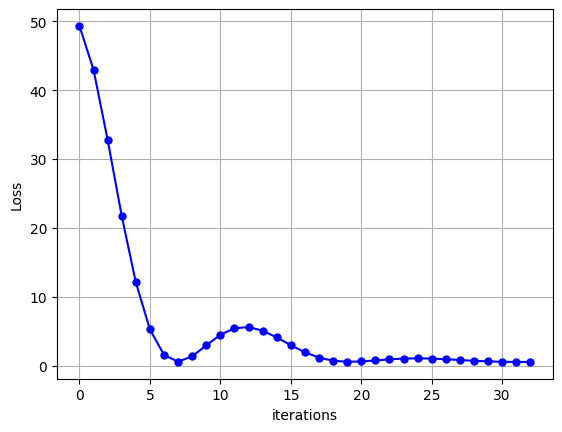

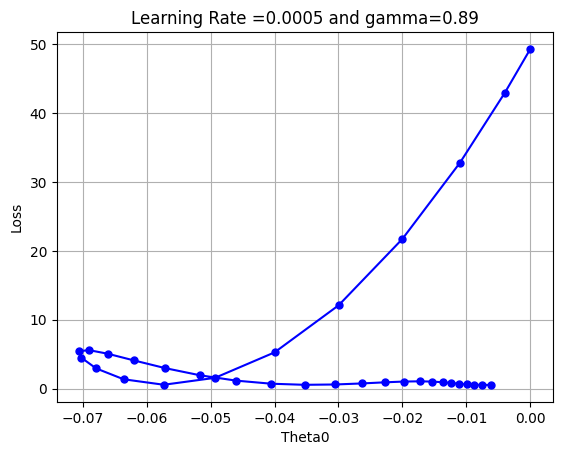

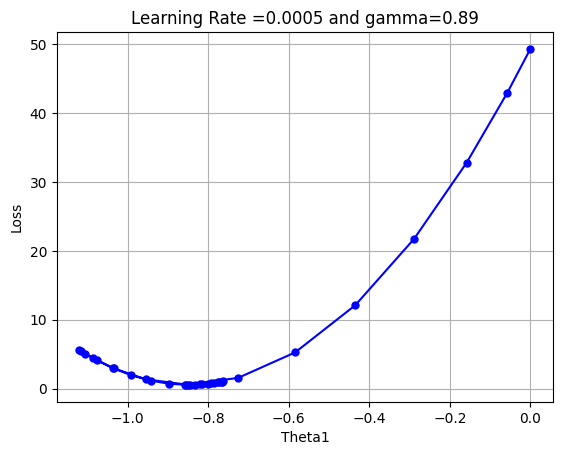

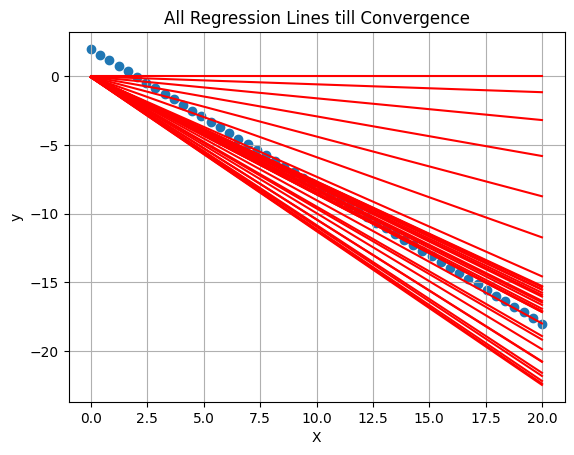

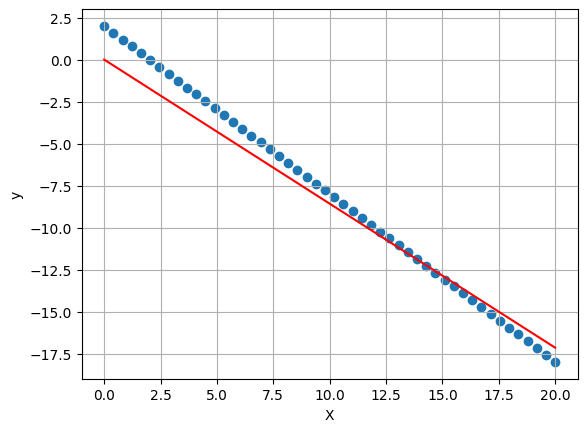

In [45]:
plt.grid()
plt.plot(loss, linestyle='-' ,marker='o',markersize=5, color='blue')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.show()
#plotting(loss,'purple')

#loss[1:].shape,Theta0.shape,Theta1.shape
plt.grid()
plt.plot(Theta0,loss, linestyle='-' ,marker='o',markersize=5, color='blue')
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.title('Learning Rate =0.0005 and gamma=0.89')
plt.show()
plt.grid()
plt.plot(Theta1,loss, linestyle='-' ,marker='o',markersize=5, color='blue')
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.title('Learning Rate =0.0005 and gamma=0.89')
plt.show()
# Plot all regression lines till converge
plt.grid()
plt.scatter(X, y)

for i in range(len(Theta0)):
    y_pred = Theta0[i] + Theta1[i] * X
    plt.plot(X, y_pred, color='red')

plt.xlabel('X')
plt.ylabel('y')
plt.title('All Regression Lines till Convergence')
plt.show()



plt.grid()
plt.scatter(X, y)


plt.plot(X, y_pred, color='red')

plt.xlabel('X')
plt.ylabel('y')

plt.show()

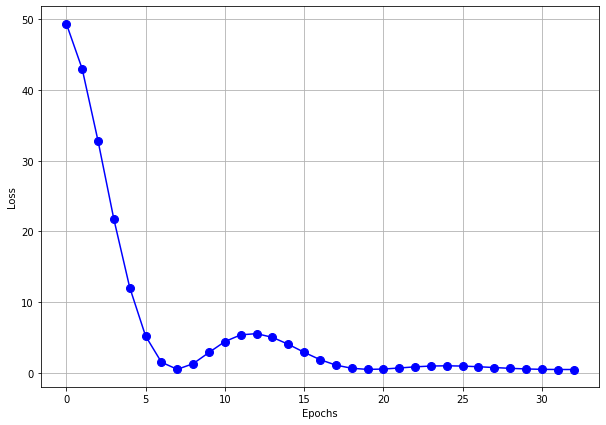

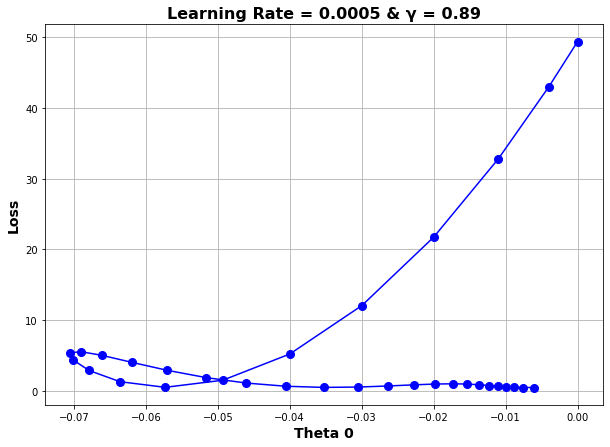

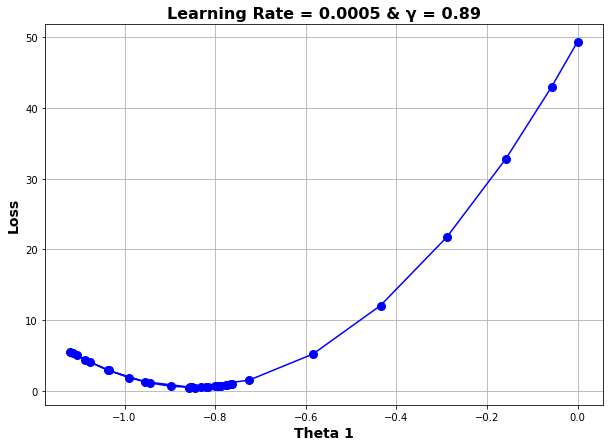

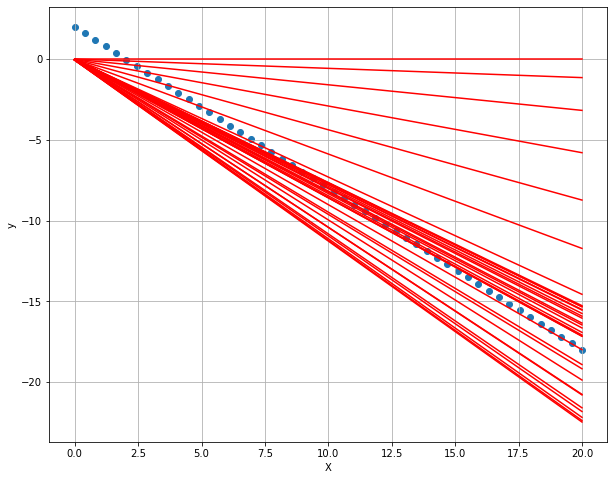

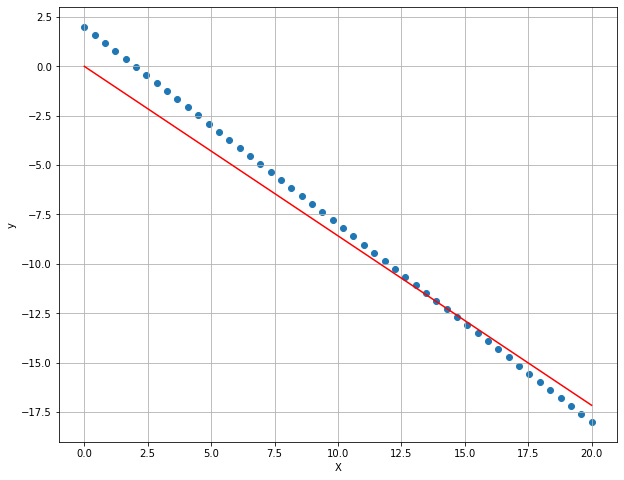